In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore') # 사이킷런1.2부터는 보스턴 없어질거라는 메세지 무시

# LinearRegression을 이용한 보스턴 주택 가격 예측

In [ ]:
# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

# 상관관계분석

In [ ]:
bostonDF.corr()['PRICE'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

In [ ]:
# 모든 Feature의 상관관계 확인
corrDF = bostonDF.corr()
corrDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


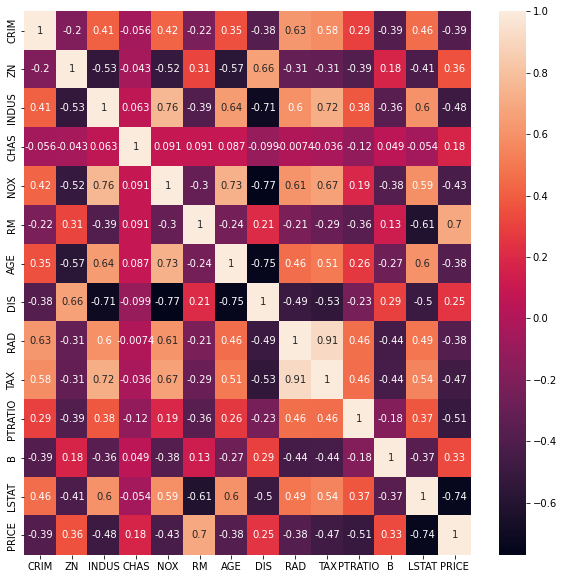

In [ ]:
# 다중공산성 같은거 보기 위해 히트맵으로 보자
plt.figure(figsize=(10,10))

sns.heatmap(
    data=corrDF,
    annot=True
)

<Figure size 1080x1080 with 0 Axes>

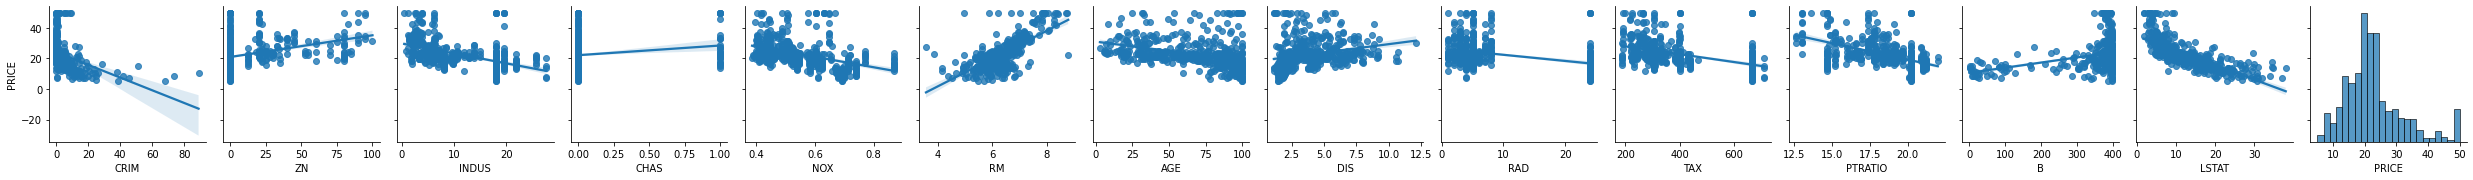

In [ ]:
plt.figure(figsize=(15,15))

#⭐
sns.pairplot(
    data=bostonDF,
    y_vars=['PRICE'],
    kind='reg'
)


plt.show()

# 데이터 확인끝. 데이터분할하자

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = bostonDF.drop("PRICE", axis=1)
y = bostonDF['PRICE']

X.shape, y.shape

((506, 13), (506,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [ ]:
# linear_regression
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr_reg.predict(X_test)
y_pred[:3]

array([28.99672362, 36.02556534, 14.81694405])

# 평가

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# MSE, 여기에 루트씌우면 RMSE

mse = mean_squared_error(y_test, y_pred) # (실제, 예측)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(mse,rmse,r2))

MSE : 24.291 / RMSE : 4.929 / R2 : 0.669


In [ ]:
bostonDF["PRICE"].describe()

# 이런거 보고 평가해야. RMSE 5마넌이네? 10마넌에서 5마넌이랑 1000만원에서 5마넌 오차는 의미가 다름.

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

# 과소적합되어있다.
50퍼 21을 예측하고싶은데 오차가 +-5라 16또는 26으로 예측할수있다.
이러면 25%, 75%를 넘어간다 엄청큰 오차

In [ ]:
# 특성과중치 확인
print("절편(bias-intercept : {}".format(lr_reg.intercept_))
print("회귀 계수값 : {}".format(np.round(lr_reg.coef_,1)))

절편(bias-intercept : 30.246750993923865
회귀 계수값 : [ -0.1   0.    0.    2.8 -17.2   4.4  -0.   -1.4   0.3  -0.   -0.9   0.
  -0.5]


In [ ]:
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

# 해석
범죄율 -0.1 범죄율이 높으면 집값이 내려간다. nox 높으면 급격히 집값하락...

# 회귀모델의 교차검증해보기

In [ ]:
from sklearn.model_selection import cross_val_score

# test_set 없다치고 그냥 다넣을거
scores = cross_val_score(
    LinearRegression(),
    X,
    y,
    cv=5

)

scores

# default값 accuracy
# 회귀에서는 분류에서마냥 정답을 맞추는게 없기때문에 이상하케 음수도나오고그럼

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [ ]:
scores_mse = cross_val_score(
    LinearRegression(),
    X,
    y,
    cv=5,
    scoring='neg_mean_squared_error'  # neg꼭붙이기⭐⭐

)

scores_mse

# 오차를 보는 회귀검정이기때문에 젤낮은 -12가 좋은거.

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [ ]:
# 진짜 mse구하는법
mse = -scores_mse
np.mean(mse)

37.13180746769886

In [ ]:
rmse = np.sqrt(np.mean(mse))
rmse

6.093587405436871

# 다항회귀을 이용한 보스턴 주택 가격 예측

## 다항회귀 이해하기


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

sample = np.array([5,4,3,2,1,0]).reshape(3,2)
print("일차 단항식 feature : \n{}".format(sample))

일차 단항식 feature : 
[[5 4]
 [3 2]
 [1 0]]


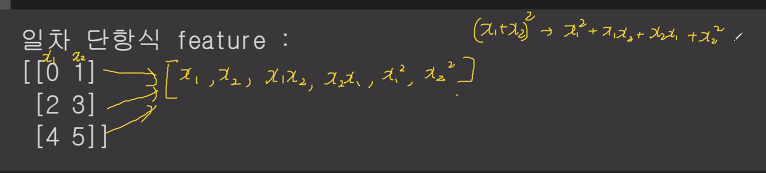

In [ ]:
# degree옵션을 이용해 몇차 다항식을 만들 것인지 설정 가능
poly = PolynomialFeatures(degree=2)
poly.fit(sample)

poly_ftr = poly.transform(sample)
print("이차 다항식 feature : \n{}".format(poly_ftr))

# 맨앞줄 1은 편향임.
# 순서는 x1, x2, x1^2, x1x2, x2^2으로 나오나봄

이차 다항식 feature : 
[[ 1.  5.  4. 25. 20. 16.]
 [ 1.  3.  2.  9.  6.  4.]
 [ 1.  1.  0.  1.  0.  0.]]


In [ ]:
bostonPoly = PolynomialFeatures(degree=3, include_bias=False) # include_bias : 변환에 의해 나오는 편향을 사용할지 여부

X_poly_3 = bostonPoly.fit_transform(X_train) # train set은 fit_transform
X_train.shape, X_poly_3.shape

((404, 13), (404, 559))

In [ ]:
lr_reg_poly = LinearRegression()
lr_reg_poly.fit(X_poly_3, y_train)

LinearRegression()

In [ ]:
X_test_poly_3 = bostonPoly.transform(X_test) # 얘는 train데이터들로 fit해놨기 때문에 따로 훈련 안해줘도 변환만해도된다.
y_pred = lr_reg_poly.predict(X_test_poly_3)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(mse,rmse,r2))

MSE : 129848.012 / RMSE : 360.344 / R2 : -1769.644


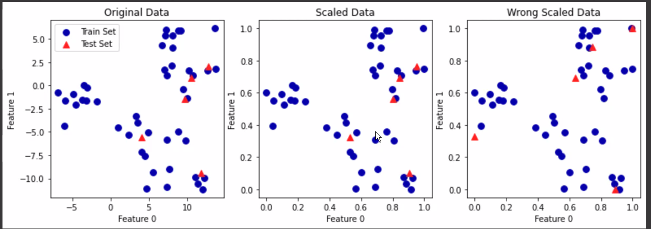

## Test셋에서는 fit해주면 안됨. min_max_scale예시그림
테스트에도 fit해주면 기준이달라짐. 쟤기준으로0~1 얘기준으로0~1해서 분포가이상해짐

# 3차보다 2차로바꾸면 성능 개올라감 워드필기보기

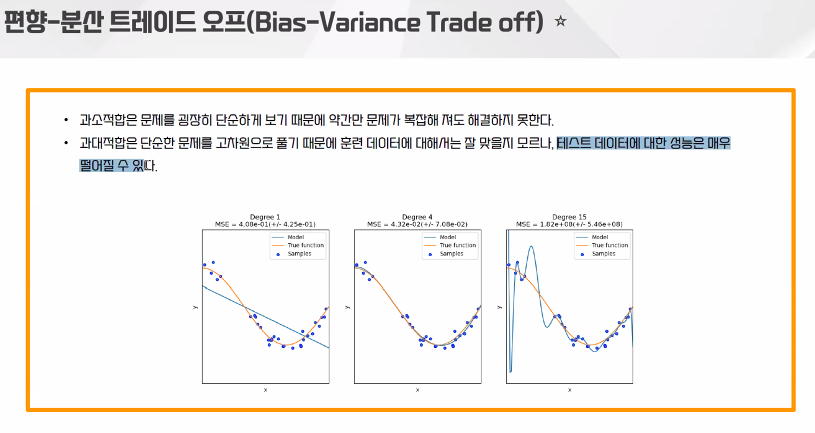

In [ ]:
# 강사님노트부분에 코드더있음

# Ridge(2차 제곱)을 활용한 규제 선형회귀 확이

In [1]:
from sklearn.linear_model import Ridge

lr_ridge = Ridge(alpha=10)
lr_ridge.fit(X_train, y_train)

ImportError: ignored

In [ ]:
ridge_pred = lr_ridge.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ridge_pred)

print("MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(mse,rmse,r2))

MSE : 24.648 / RMSE : 4.965 / R2 : 0.664


## 해석
안그대로 과소적합된 모델이었는데 더 과소적합 만들었나봄

## 아까 3차 다항회귀처럼 과대적합된걸 일부러 만들어서 릿지해보자

In [ ]:
boston_poly = PolynomialFeatures(degree=3, include_bias = False)
X_train_3 = boston_poly.fit_transform(X_train)
X_test_3 = boston_poly.transform(X_test)

X_train_3.shape, X_test_3.shape

((404, 559), (102, 559))

In [ ]:
lr_reg = LinearRegression().fit(X_train_3, y_train)
ridge_reg = Ridge(alpha=10).fit(X_train_3, y_train)

In [ ]:
lr_train_pred = lr_reg.predict(X_train_3)
ridge_train_pred = ridge_reg.predict(X_train_3)

lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_train_rmse = np.sqrt(lr_train_mse)
lr_train_r2 = r2_score(y_train, lr_train_pred)

ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_train_rmse = np.sqrt(ridge_train_mse)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)

In [ ]:
print("LinearRegression MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(lr_train_mse, lr_train_rmse, lr_train_r2))
# 아까 가중치가 졸라컸음

LinearRegression MSE : 0.000 / RMSE : 0.000 / R2 : 1.000


In [ ]:
print("Ridge MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(ridge_train_mse, ridge_train_rmse, ridge_train_r2))

# 훈련세트의 성능이 좀 떨어지더라도 TEST에서 맞추는게 중요하다
# 위결과에비해 가중치가 좀 줄어들었다❤

Ridge MSE : 3.586 / RMSE : 1.894 / R2 : 0.959


In [ ]:
# test셋에서 해보기

lr_test_pred = lr_reg.predict(X_test_3)
ridge_test_pred = ridge_reg.predict(X_test_3)

lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_test_r2 = r2_score(y_test, lr_test_pred)

ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print("LinearRegression MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(lr_test_mse, lr_test_rmse, lr_test_r2))
print("Ridge MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(ridge_test_mse, ridge_test_rmse, ridge_test_r2))

LinearRegression MSE : 129848.012 / RMSE : 360.344 / R2 : -1769.644
Ridge MSE : 120.396 / RMSE : 10.973 / R2 : -0.642


# 알파가 점점커져가면 회귀계수들이 감소하고있다!!

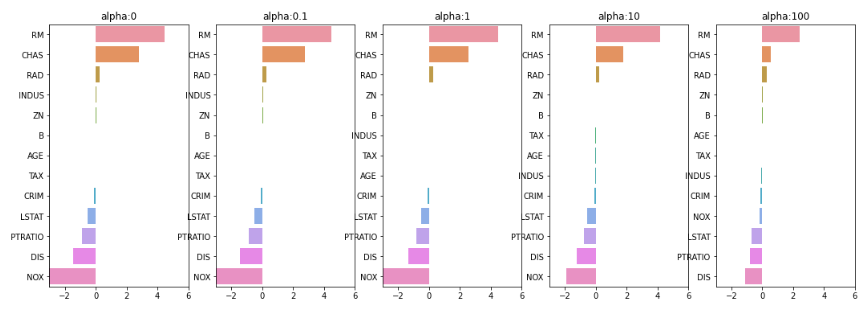


코드는 강사님 노트

# 라쏘해보자!(1차 절댓값)
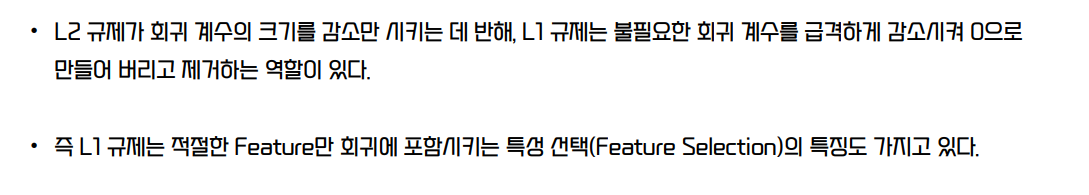

In [ ]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso(alpha=10)
lr_lasso.fit(X_train, y_train)

Lasso(alpha=10)

In [ ]:
lasso_pred = lr_lasso.predict(X_test)

mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)

print("MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(mse, rmse, r2))

MSE : 34.686 / RMSE : 5.889 / R2 : 0.527


In [ ]:
# 라쏘는 너무작은 가중치는 0으로만듦
lr_lasso.coef_

array([-0.        ,  0.00632092, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.0090727 ,
       -0.        ,  0.00989229, -0.60414765])

In [ ]:
# 릿지는 0은안됨 0에 가까워도 걍냅둠
lr_ridge.coef_

array([-0.10713363,  0.03555248, -0.02627747,  1.81329133, -1.88924475,
        4.19532572, -0.01534126, -1.23262135,  0.24803063, -0.01274419,
       -0.76176896,  0.01283334, -0.561835  ])

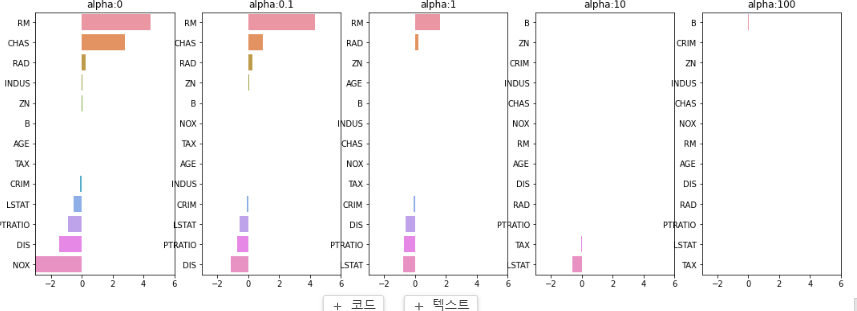